In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\my3_1771976.csv')
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\id1_1753200.csv')
df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\ph3_1754148.csv')
#dfa = pd.concat([df11,df12]) #([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df11

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-06-29 17:07:44 +0800,1,108.843537,204.819277,16493.506494,10942.122186,24,50,7.0,8
1,2022-06-29 17:08:04 +0800,2,115.646259,185.542169,16251.082251,2038.585209,24,51,7.0,7
2,2022-06-29 17:08:24 +0800,3,115.646259,168.674699,16246.753247,1106.109325,24,51,6.0,7
3,2022-06-29 17:08:44 +0800,4,3.401361,84.337349,14277.056277,736.334405,24,50,8.0,8
4,2022-06-29 17:09:04 +0800,5,6.802721,72.289157,8411.255411,598.070740,24,51,5.0,5
...,...,...,...,...,...,...,...,...,...,...
1830853,2023-12-31 23:58:26 +0800,1999173,10.204082,0.000000,1177.489177,0.000000,25,92,117.0,124
1830854,2023-12-31 23:58:46 +0800,1999174,10.204082,0.000000,1181.818182,0.000000,25,92,119.0,127
1830855,2023-12-31 23:59:06 +0800,1999175,6.802721,0.000000,1147.186147,0.000000,25,92,114.0,122
1830856,2023-12-31 23:59:26 +0800,1999176,6.802721,0.000000,1116.883117,0.000000,25,92,112.0,120


In [3]:
dfa = df11[['created_at','field1','field2','field3','field4','field5',
            'field6','field7','field8']]
#df12.columns = ['created_at', 'id','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']
dfa

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-06-29 17:07:44 +0800,108.843537,204.819277,16493.506494,10942.122186,24,50,7.0,8
1,2022-06-29 17:08:04 +0800,115.646259,185.542169,16251.082251,2038.585209,24,51,7.0,7
2,2022-06-29 17:08:24 +0800,115.646259,168.674699,16246.753247,1106.109325,24,51,6.0,7
3,2022-06-29 17:08:44 +0800,3.401361,84.337349,14277.056277,736.334405,24,50,8.0,8
4,2022-06-29 17:09:04 +0800,6.802721,72.289157,8411.255411,598.070740,24,51,5.0,5
...,...,...,...,...,...,...,...,...,...
1830853,2023-12-31 23:58:26 +0800,10.204082,0.000000,1177.489177,0.000000,25,92,117.0,124
1830854,2023-12-31 23:58:46 +0800,10.204082,0.000000,1181.818182,0.000000,25,92,119.0,127
1830855,2023-12-31 23:59:06 +0800,6.802721,0.000000,1147.186147,0.000000,25,92,114.0,122
1830856,2023-12-31 23:59:26 +0800,6.802721,0.000000,1116.883117,0.000000,25,92,112.0,120


In [4]:
def pp_sample_fill(df, ts_col, s_freq, fill_method):
    df[ts_col] = df[ts_col].apply(lambda x:x.split('+')[0])
    df[ts_col] = pd.to_datetime(df[ts_col])
    df[ts_col] = df[ts_col].dt.round('min')
    df.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    df.set_index(ts_col, inplace=True)
    data=df.resample(s_freq).mean()
    data.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    return data

In [5]:
df=pd.DataFrame()
df[['created_at','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']] = dfa[['created_at','field1',
                                                                           'field2','field3',
                                                                           'field4','field5',
                                                                           'field6','field7',
                                                                           'field8']]
df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.round('min')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2022-06-29 17:08:00,108.843537,204.819277,16493.506494,10942.122186,24,50,7.0,8
1,2022-06-29 17:08:00,115.646259,185.542169,16251.082251,2038.585209,24,51,7.0,7
2,2022-06-29 17:08:00,115.646259,168.674699,16246.753247,1106.109325,24,51,6.0,7
3,2022-06-29 17:09:00,3.401361,84.337349,14277.056277,736.334405,24,50,8.0,8
4,2022-06-29 17:09:00,6.802721,72.289157,8411.255411,598.070740,24,51,5.0,5
...,...,...,...,...,...,...,...,...,...
1830853,2023-12-31 23:58:00,10.204082,0.000000,1177.489177,0.000000,25,92,117.0,124
1830854,2023-12-31 23:59:00,10.204082,0.000000,1181.818182,0.000000,25,92,119.0,127
1830855,2023-12-31 23:59:00,6.802721,0.000000,1147.186147,0.000000,25,92,114.0,122
1830856,2023-12-31 23:59:00,6.802721,0.000000,1116.883117,0.000000,25,92,112.0,120


In [6]:
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2022-06-29 17:08:00,108.843537,204.819277,16493.506494,10942.122186,24,50,7.0,8
1,2022-06-29 17:08:00,115.646259,185.542169,16251.082251,2038.585209,24,51,7.0,7
2,2022-06-29 17:08:00,115.646259,168.674699,16246.753247,1106.109325,24,51,6.0,7
3,2022-06-29 17:09:00,3.401361,84.337349,14277.056277,736.334405,24,50,8.0,8
4,2022-06-29 17:09:00,6.802721,72.289157,8411.255411,598.070740,24,51,5.0,5
...,...,...,...,...,...,...,...,...,...
1830853,2023-12-31 23:58:00,10.204082,0.000000,1177.489177,0.000000,25,92,117.0,124
1830854,2023-12-31 23:59:00,10.204082,0.000000,1181.818182,0.000000,25,92,119.0,127
1830855,2023-12-31 23:59:00,6.802721,0.000000,1147.186147,0.000000,25,92,114.0,122
1830856,2023-12-31 23:59:00,6.802721,0.000000,1116.883117,0.000000,25,92,112.0,120


<AxesSubplot:>

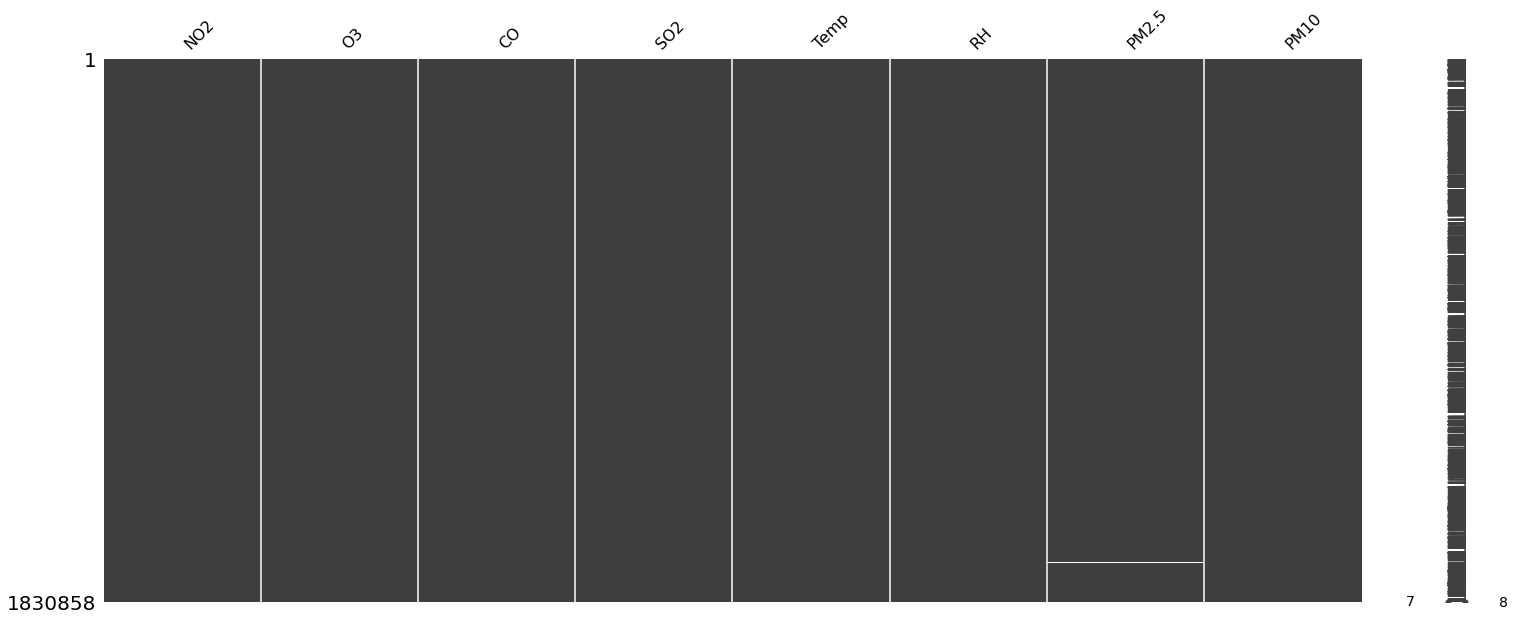

In [7]:
import missingno as msno

msno.matrix(df.set_index('created_at'))

In [8]:
df = df
df['Datetime'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10,Datetime
0,2022-06-29 17:08:00,108.843537,204.819277,16493.506494,10942.122186,24,50,7.0,8,2022-06-29 17:08:00
1,2022-06-29 17:08:00,115.646259,185.542169,16251.082251,2038.585209,24,51,7.0,7,2022-06-29 17:08:00
2,2022-06-29 17:08:00,115.646259,168.674699,16246.753247,1106.109325,24,51,6.0,7,2022-06-29 17:08:00
3,2022-06-29 17:09:00,3.401361,84.337349,14277.056277,736.334405,24,50,8.0,8,2022-06-29 17:09:00
4,2022-06-29 17:09:00,6.802721,72.289157,8411.255411,598.070740,24,51,5.0,5,2022-06-29 17:09:00
...,...,...,...,...,...,...,...,...,...,...
1830853,2023-12-31 23:58:00,10.204082,0.000000,1177.489177,0.000000,25,92,117.0,124,2023-12-31 23:58:00
1830854,2023-12-31 23:59:00,10.204082,0.000000,1181.818182,0.000000,25,92,119.0,127,2023-12-31 23:59:00
1830855,2023-12-31 23:59:00,6.802721,0.000000,1147.186147,0.000000,25,92,114.0,122,2023-12-31 23:59:00
1830856,2023-12-31 23:59:00,6.802721,0.000000,1116.883117,0.000000,25,92,112.0,120,2023-12-31 23:59:00


In [9]:
#df2 = df1.reset_index(drop='index')[:29233]
dfc = df.set_index('Datetime').resample('1H').mean()
dfc

C:\Users\Lab Engineer\AppData\Local\Temp\ipykernel_15060\1232986345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfc = df.set_index('Datetime').resample('1H').mean()


,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,12.624280,21.007105,2098.734599,184.166048,26.012821,57.307692,4.750000,4.935897
2022-06-29 18:00:00,9.372638,4.738956,1116.714767,28.563773,28.133333,61.561111,5.088889,5.344444
2022-06-29 19:00:00,6.462585,0.816600,912.433862,20.578778,29.000000,62.988889,8.100000,8.527778
2022-06-29 20:00:00,6.042641,0.121155,864.083775,18.035172,29.000000,63.296089,10.944134,11.491620
2022-06-29 21:00:00,5.536659,0.066934,862.265512,18.042158,29.000000,64.000000,13.711111,14.294444
...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,13.605442,7.791165,1259.331409,0.017864,25.227778,92.966667,102.327778,108.438889
2023-12-31 21:00:00,12.547241,6.974565,1886.580087,0.482315,25.605556,90.705556,148.361111,156.638889
2023-12-31 22:00:00,10.600907,6.251673,1783.164983,1.429082,25.094444,91.722222,147.233333,155.588889


<AxesSubplot:xlabel='Datetime'>

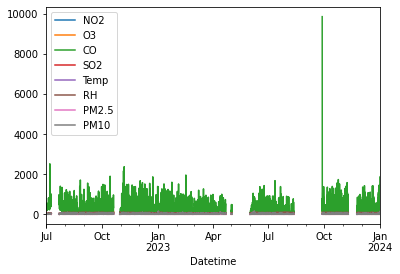

In [10]:
dfc.plot()

<AxesSubplot:xlabel='Datetime'>

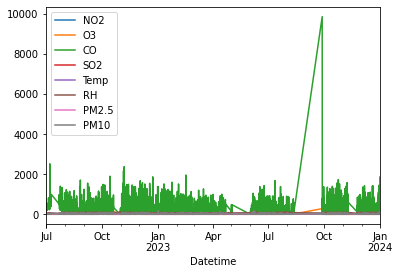

In [11]:
#df1.set_index('created_at', inplace=True)
#df1.resample('1D').mean()
#df2
df_pi = dfc#.reset_index()[['NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']]
df_imputed = df_pi.interpolate(method='time')
df_imputed.plot()

df.isnull().sum()

In [12]:

data = df_imputed#.set_index('To Date')#.fillna(method="ffill", axis=None, inplace=False, limit=None, downcast=None)
data

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,12.624280,21.007105,2098.734599,184.166048,26.012821,57.307692,4.750000,4.935897
2022-06-29 18:00:00,9.372638,4.738956,1116.714767,28.563773,28.133333,61.561111,5.088889,5.344444
2022-06-29 19:00:00,6.462585,0.816600,912.433862,20.578778,29.000000,62.988889,8.100000,8.527778
2022-06-29 20:00:00,6.042641,0.121155,864.083775,18.035172,29.000000,63.296089,10.944134,11.491620
2022-06-29 21:00:00,5.536659,0.066934,862.265512,18.042158,29.000000,64.000000,13.711111,14.294444
...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,13.605442,7.791165,1259.331409,0.017864,25.227778,92.966667,102.327778,108.438889
2023-12-31 21:00:00,12.547241,6.974565,1886.580087,0.482315,25.605556,90.705556,148.361111,156.638889
2023-12-31 22:00:00,10.600907,6.251673,1783.164983,1.429082,25.094444,91.722222,147.233333,155.588889


In [13]:

#dfa = dfa.set_index('To Date')
#data.reset_index(inplace=True)
print(data.isnull().sum())

NO2      0
O3       0
CO       0
SO2      0
Temp     0
RH       0
PM2.5    0
PM10     0
dtype: int64


In [14]:
#dfc.reset_index(inplace=True)

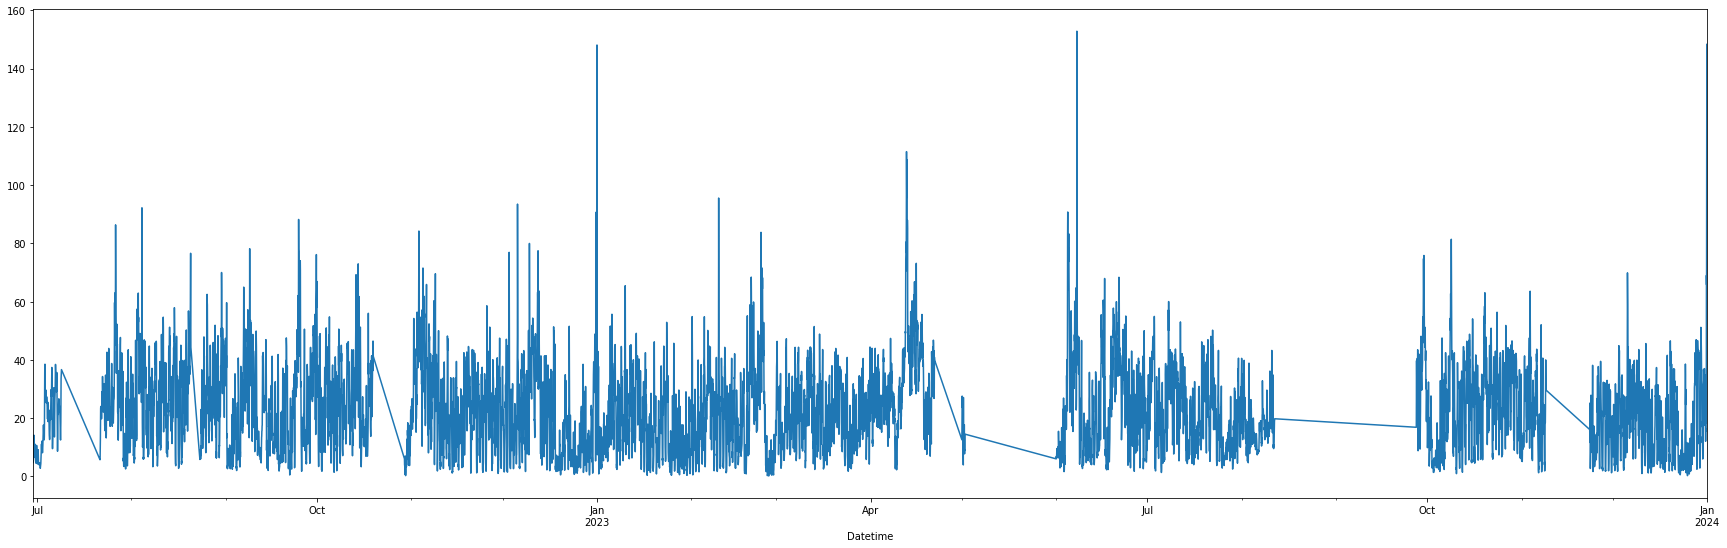

In [15]:
plt.figure(figsize=(30,9))
data['PM2.5'].iloc[:].plot()

plt.show()

In [16]:
data['O3'].iloc[:2000]

Datetime
2022-06-29 17:00:00    21.007105
2022-06-29 18:00:00     4.738956
2022-06-29 19:00:00     0.816600
2022-06-29 20:00:00     0.121155
2022-06-29 21:00:00     0.066934
                         ...    
2022-09-20 20:00:00    23.360107
2022-09-20 21:00:00    17.536814
2022-09-20 22:00:00    18.433735
2022-09-20 23:00:00    16.894244
2022-09-21 00:00:00    17.429719
Freq: H, Name: O3, Length: 2000, dtype: float64

<AxesSubplot:>

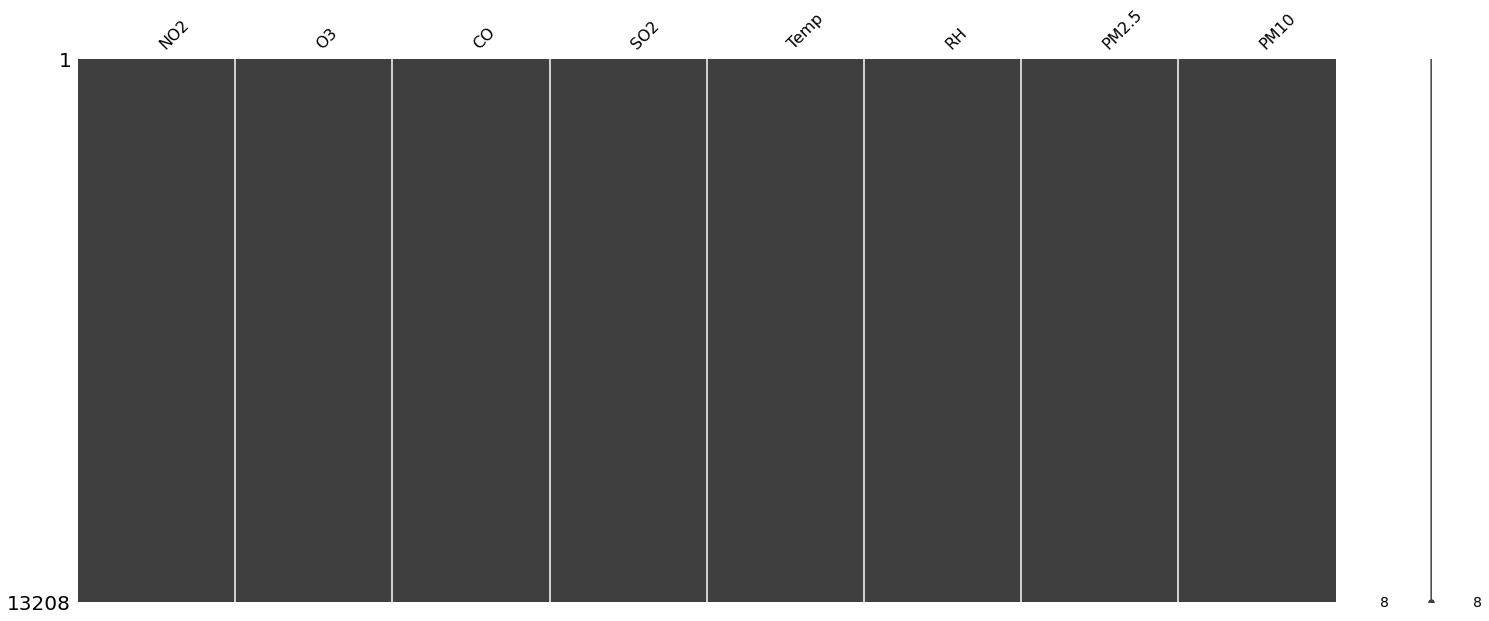

In [17]:
msno.matrix(data)

In [18]:
testdf = data[data.isnull()==False]
testdf

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-06-29 17:00:00,12.624280,21.007105,2098.734599,184.166048,26.012821,57.307692,4.750000,4.935897
2022-06-29 18:00:00,9.372638,4.738956,1116.714767,28.563773,28.133333,61.561111,5.088889,5.344444
2022-06-29 19:00:00,6.462585,0.816600,912.433862,20.578778,29.000000,62.988889,8.100000,8.527778
2022-06-29 20:00:00,6.042641,0.121155,864.083775,18.035172,29.000000,63.296089,10.944134,11.491620
2022-06-29 21:00:00,5.536659,0.066934,862.265512,18.042158,29.000000,64.000000,13.711111,14.294444
...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,13.605442,7.791165,1259.331409,0.017864,25.227778,92.966667,102.327778,108.438889
2023-12-31 21:00:00,12.547241,6.974565,1886.580087,0.482315,25.605556,90.705556,148.361111,156.638889
2023-12-31 22:00:00,10.600907,6.251673,1783.164983,1.429082,25.094444,91.722222,147.233333,155.588889


In [19]:
target = ['NO2','O3',
         'CO','SO2',
         'PM2.5','PM10']
covs = ['Temp', 'RH']
d_var = data[target]
d_covar = data[covs]

In [20]:
from darts.timeseries import TimeSeries

ts_1 = TimeSeries.from_dataframe(d_var)
ts_2 = TimeSeries.from_dataframe(d_covar)

train_Y = ts_1.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X = ts_2.drop_after(pd.Timestamp('2023-01-31 23:00:00'))

test_Y = ts_1.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X = ts_2.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

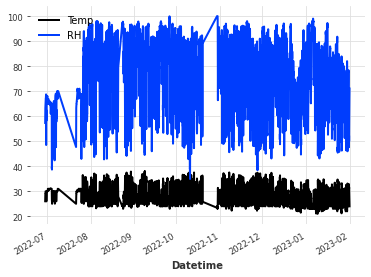

In [21]:
train_X.plot()

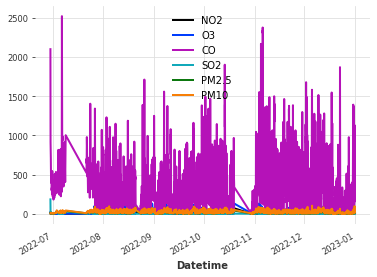

In [22]:
train_Y.plot()

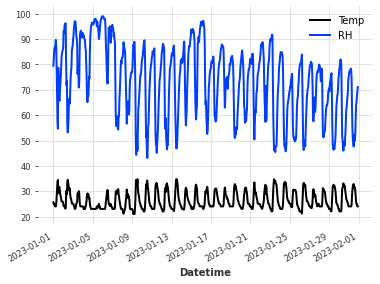

In [23]:
test_X.plot()

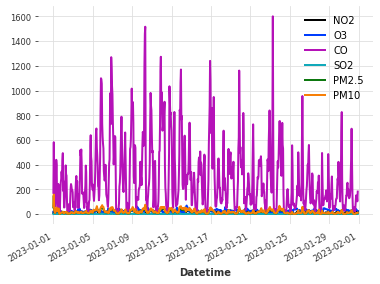

In [24]:
test_Y.plot()

In [25]:
from sklearn.preprocessing import MinMaxScaler
from darts.dataprocessing.transformers import Scaler

scaler = MinMaxScaler(feature_range=(0,1))
transformer1 = Scaler(scaler)
transformer2 = Scaler(scaler)
ts_1_transformed = transformer1.fit_transform(ts_1)
ts_2_transformed = transformer2.fit_transform(ts_2)

In [26]:
train_Y_scaled = ts_1_transformed.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X_scaled = ts_2_transformed.drop_after(pd.Timestamp('2023-01-31 23:00:00'))
                                                                                             
test_Y_scaled = ts_1_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X_scaled = ts_2_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

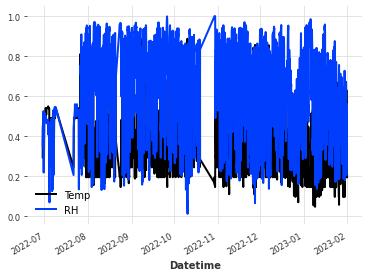

In [27]:
train_X_scaled.plot()

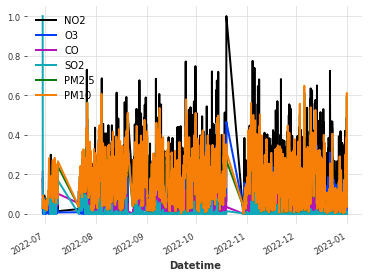

In [28]:
train_Y_scaled.plot()

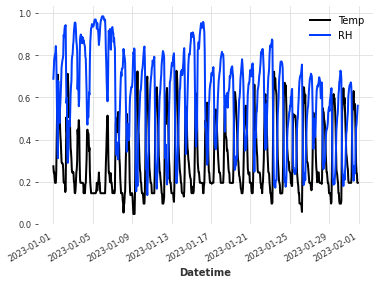

In [29]:
test_X_scaled.plot()

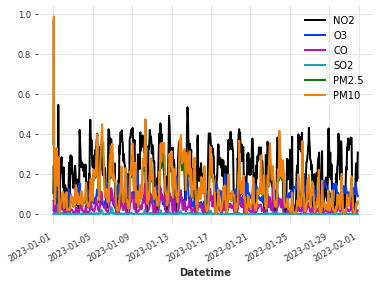

In [30]:
test_Y_scaled.plot()

In [31]:
from darts.models.forecasting.regression_model import RegressionModel as RM
from sklearn.linear_model import Ridge

model_rm = RM(model=Ridge(),
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24)
model_rm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rm = model_rm.predict(len(test_X_scaled))

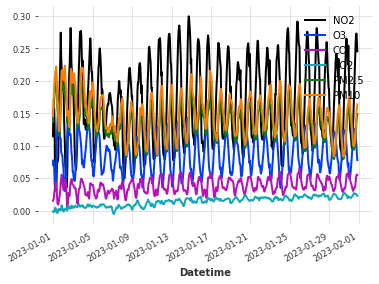

In [32]:
pred_rm.plot()

In [33]:
from darts.models import LinearRegressionModel as LRM

model_lrm = LRM(
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24,
multi_models=True)
model_lrm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lrm = model_lrm.predict(len(test_X_scaled))

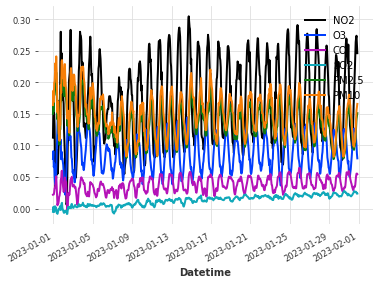

In [34]:
pred_lrm.plot()

In [35]:
from darts.models import BlockRNNModel as RNN

model_rnn = RNN(model='RNN',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_rnn.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_rnn = model_rnn.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 38.0 K
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
47.4 K    Trainable params
0         Non-trainable params
47.4 K    Total params
0.379     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

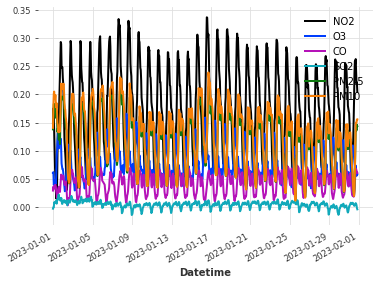

In [36]:
pred_rnn.plot()

In [37]:
model_lstm = RNN(model='LSTM',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_lstm.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_lstm = model_lstm.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 152 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
161 K     Trainable params
0         Non-trainable params
161 K     Total params
1.291     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

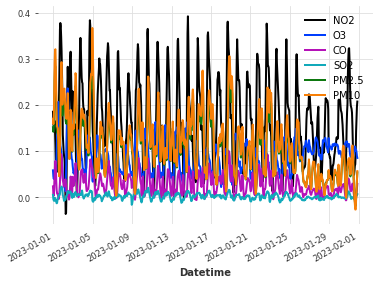

In [38]:
pred_lstm.plot()

In [39]:
model_gru = RNN(model='GRU',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_gru.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_gru = model_gru.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 114 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
123 K     Trainable params
0         Non-trainable params
123 K     Total params
0.987     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

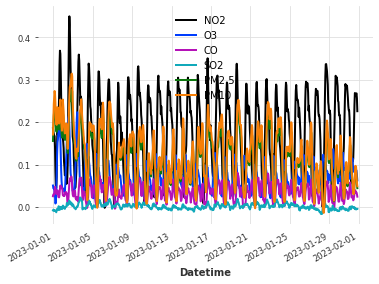

In [40]:
pred_gru.plot()

In [41]:
from darts.models import XGBModel as XGB

model_xgb = XGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_xgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_xgb = model_xgb.predict(len(test_Y_scaled))

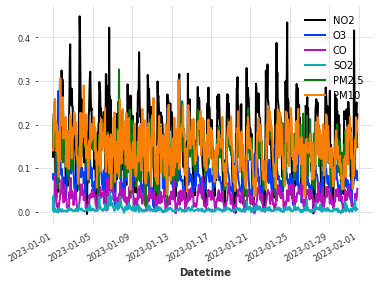

In [42]:
pred_xgb.plot()

In [43]:
from darts.models import LightGBMModel as LGB

model_lgb = LGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_lgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lgb = model_lgb.predict(len(test_Y_scaled))

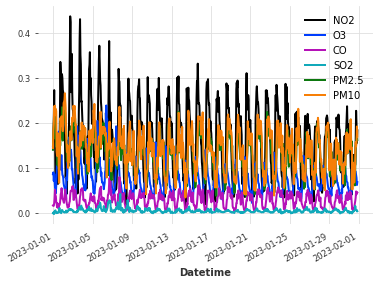

In [44]:
pred_lgb.plot()

In [45]:
from darts.models import RandomForest as RF

model_rf = RF(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24,
             n_estimators=500,
             max_depth=50,
             multi_models=True)

model_rf.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rf = model_rf.predict(len(test_Y_scaled))

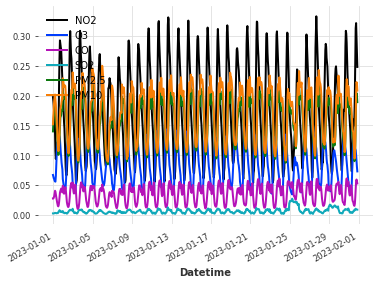

In [46]:
pred_rf.plot()

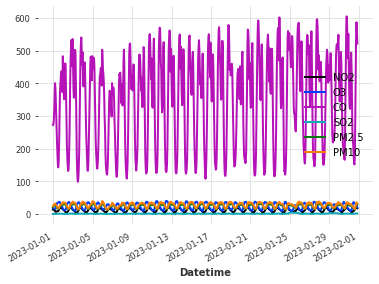

In [47]:
transformer1.inverse_transform(pred_rf).plot()

In [48]:
transformer1.inverse_transform(pred_rnn).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\rnn_preds.xlsx')
transformer1.inverse_transform(pred_lstm).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\lstm_preds.xlsx')
transformer1.inverse_transform(pred_gru).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\gru_preds.xlsx')
transformer1.inverse_transform(pred_xgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\xgb_preds.xlsx')
transformer1.inverse_transform(pred_lgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\lgb_preds.xlsx')
transformer1.inverse_transform(pred_rf).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\rf_preds.xlsx')
transformer1.inverse_transform(test_Y_scaled).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\PH3\actuals.xlsx')